### Segmentez des clients d'un site e-commerce - Analyse exploratoire

### Sommaire


* [1. Importation des librairies, définition des fonctions et importation des fichiers](#1)
    * [1.1 Importation des librairies](#1_1)
    * [1.2 Fonctions](#1_2)
    * [1.3 Importation des fichiers](#1_3)
* [2. Visualisation des données](#2)
* [3. Jointures des différents fichiers](#3)
* [4. Valeurs manquantes](#4)
* [5. Suppression des colonnes non-utiles](#5)
    * [5.1 Statuts des commandes](#5_1)
    * [5.2 Suppression des autres colonnes](#5_2)
* [6. Analyse exploratoire](#6)
    * [6.1 Nombre de commandes par date d'achat](#6_1)
    * [6.2 Répartition des prix des produits](#6_2)
    * [6.3 Profils des clients](#6_3)
    * [6.4 Localisation des clients](#6_4)
    * [6.5 Review Score](#6_5)
    * [6.6 Distribution des variables quantitatives](#6_6)
    * [6.7 Analyse des corrélations](#6_7)
* [7. Feature engineering](#7)
    * [7.1 RFM (Récence, Fréquence et Montant)](#7_1)
    * [7.2 Moyenne des scores de commentaire](#7_2)
* [8. Export des DataFrames](#8)
    * [8.1 Export du DataFrame df_clustering](#8_1)
    * [8.2 Export du DataFrame df_merge](#8_2)

## 1. Importation des librairies, définition des fonctions et importation des fichiers <a class="anchor" id="1"></a>

### 1.1 Importation des librairies <a class="anchor" id="1_1"></a>

In [1]:
# Data
import pandas as pd
import numpy as np

# Graphiques
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Fonctions <a class="anchor" id="1_2"></a>

In [2]:
def pourcentage(df):
    """Fonction dataframe pourcentage de valeurs manquantes"""
    pourcentage_valeurs_manquantes = (df.isna().sum() / len(df)) * 100
    df_pourcentage_manquant = pd.DataFrame({
        'Nom de la colonne': pourcentage_valeurs_manquantes.index,
        'Pourcentage de valeurs manquantes': pourcentage_valeurs_manquantes.values
    })
    df_pourcentage_manquant = df_pourcentage_manquant.sort_values(
        'Pourcentage de valeurs manquantes',
        ascending=False
    ).reset_index(drop=True)
    return df_pourcentage_manquant

def doublons(df):
    """Check des doublons"""
    if df.duplicated().sum() > 0:
        print('Le nombre de doublons présents dans le Dataframe est de : ', df.duplicated().sum())
    else:
        print('Pas de doublons présents dans le Dataframe.')

### 1.3 Importation des fichiers <a class="anchor" id="1_3"></a>

In [3]:
df_products = pd.read_csv('olist_products_dataset.csv', delimiter=',')
df_sellers = pd.read_csv('olist_sellers_dataset.csv', delimiter=',')
df_order_items = pd.read_csv('olist_order_items_dataset.csv', delimiter=',')
df_order_payments = pd.read_csv('olist_order_payments_dataset.csv', delimiter=',')
df_orders_dataset = pd.read_csv('olist_orders_dataset.csv', delimiter=',')
df_customers = pd.read_csv('olist_customers_dataset.csv', delimiter=',')
df_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv', delimiter=',')
df_geolocalisation = pd.read_csv('olist_geolocation_dataset.csv', delimiter=',')
df_category_name = pd.read_csv('product_category_name_translation.csv', delimiter=',')

## 2. Visualisation des données <a class="anchor" id="2"></a>

In [4]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [5]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [6]:
doublons(df_products)

Pas de doublons présents dans le Dataframe.


In [7]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [8]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [9]:
doublons(df_sellers)

Pas de doublons présents dans le Dataframe.


In [10]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [11]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [12]:
doublons(df_order_items)

Pas de doublons présents dans le Dataframe.


In [13]:
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [14]:
df_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [15]:
doublons(df_order_payments)

Pas de doublons présents dans le Dataframe.


In [16]:
df_orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [17]:
df_orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [18]:
doublons(df_orders_dataset)

Pas de doublons présents dans le Dataframe.


In [19]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [20]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [21]:
doublons(df_customers)

Pas de doublons présents dans le Dataframe.


In [22]:
# Vérifions pourquoi on a 2 id pour le customer
print(f"Le nombre de 'customer_id' est de {df_customers['customer_id'].nunique()}, "
      f"pour {len(df_customers['customer_id'])} lignes.")
print(f"Le nombre de 'customer_unique_id' est de {df_customers['customer_unique_id'].nunique()}, "
      f"pour {len(df_customers['customer_id'])} lignes.")

Le nombre de 'customer_id' est de 99441, pour 99441 lignes.
Le nombre de 'customer_unique_id' est de 96096, pour 99441 lignes.


On peut donc en conclure que le customer_id est unique pour chaque commandes mais que le vrai id unique du client est le customer_unique_id.

In [23]:
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [24]:
df_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [25]:
doublons(df_order_reviews)

Pas de doublons présents dans le Dataframe.


In [26]:
df_geolocalisation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [27]:
df_geolocalisation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [28]:
doublons(df_geolocalisation)

Le nombre de doublons présents dans le Dataframe est de :  261831


In [29]:
# Supprimer les doublons
df_geolocalisation.drop_duplicates(subset=['geolocation_zip_code_prefix'], inplace=True, ignore_index=True)

# Vérifier la forme après suppression des doublons
df_geolocalisation.shape

(19015, 5)

In [30]:
# Changer le nom de la clé
df_geolocalisation = df_geolocalisation.rename(columns={'geolocation_zip_code_prefix': 'customer_zip_code_prefix'})

In [31]:
df_category_name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [32]:
df_category_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [33]:
doublons(df_category_name)

Pas de doublons présents dans le Dataframe.


## 3. Jointures des différents fichiers <a class="anchor" id="3"></a>

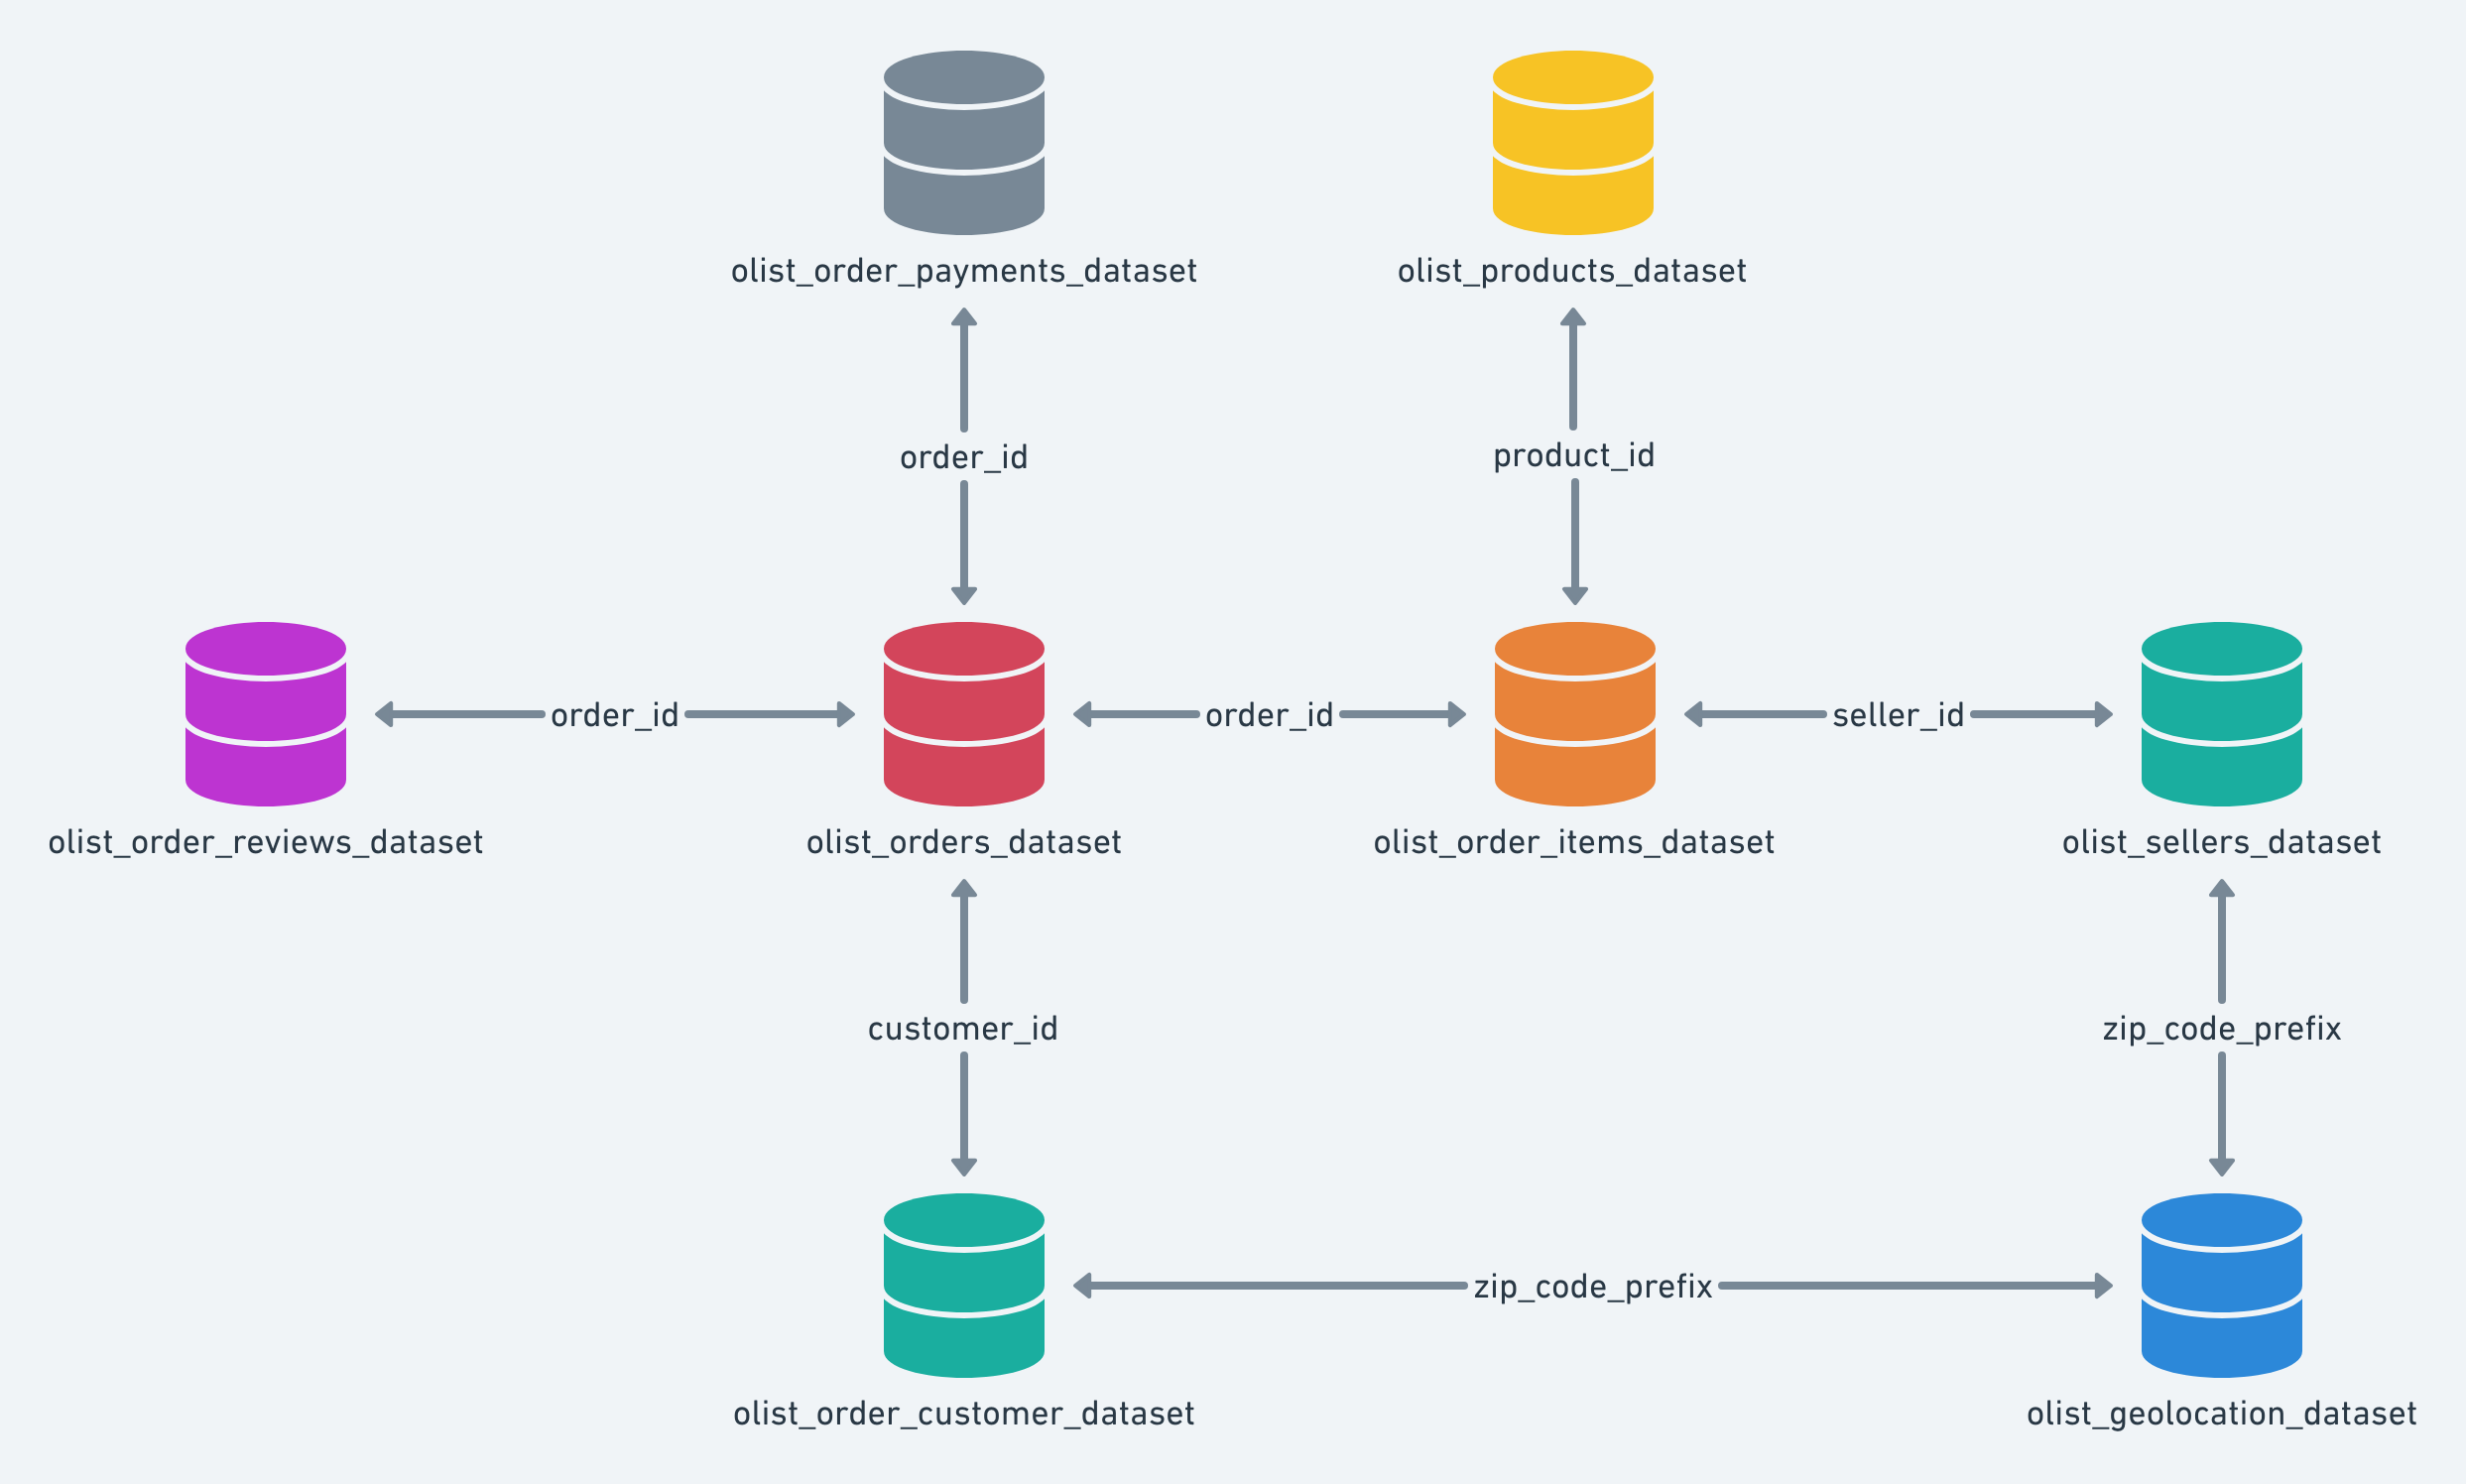

In [34]:
# Jointures
df_merge = pd.merge(df_order_items, df_products, how='left', on='product_id')
df_merge = pd.merge(df_merge, df_sellers, how='left', on='seller_id')
df_merge = pd.merge(df_orders_dataset, df_merge, how='inner', on='order_id')
df_merge = pd.merge(df_merge, df_order_payments, how='inner', on='order_id')
df_merge = pd.merge(df_merge, df_order_reviews, how='inner', on='order_id')
df_merge = pd.merge(df_merge, df_customers, how='inner', on='customer_id')
df_merge = pd.merge(df_merge, df_geolocalisation, how='inner', on='customer_zip_code_prefix')
df_merge = pd.merge(df_merge, df_category_name, how='inner', on='product_category_name')

# Traduire la colonne product_category_name
df_merge['product_category_name'] = df_merge['product_category_name_english']
df_merge.drop('product_category_name_english', axis=1, inplace=True)

In [35]:
pd.set_option("display.max_columns", None) # Pour afficher toutes les colonnes
df_merge.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,3,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,2,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,sao paulo,SP
3,b20e167bec039233a097f9204caca32d,f26b7c2fcccc65373668a87f61c988b3,delivered,2018-04-14 23:13:00,2018-04-14 23:31:35,2018-04-16 19:08:33,2018-04-23 15:56:40,2018-05-03 00:00:00,1,9fbfc0d1a475bb65f9c0e39bb927a99a,ec80e49e69745ab6c14f984bf2149423,2018-04-18 23:30:53,288.00,9.20,housewares,38.0,772.0,1.0,4450.0,16.0,29.0,23.0,13480,limeira,SP,1,credit_card,8,297.20,ac8bb751aa5e015cb7c64e72114f6d11,4,NaN,NaN,2018-04-24 00:00:00,2018-04-25 19:50:18,0f4389ffbcaa187a02a5ebeb0a2e616c,9195,santo andre,SP,-23.675037,-46.524784,santo andre,SP
4,ab4e9c7509c66adaea2fe37d7e1537c4,080dddcff1908969446b2a21dce2fc68,delivered,2018-07-24 23:00:46,2018-07-24 23:10:14,2018-07-31 15:50:00,2018-08-03 17:28:55,2018-08-15 00:00:00,1,ada800a927673ac73cdfbbd2c832331b,ffdd9f82b9a447f6f8d4b91554cc7dd3,2018-07-31 23:10:14,58.60,21.71,housewares,59.0,513.0,1.0,2350.0,29.0,34.0,16.0,80030,curitiba,PR,1,credit_card,4,80.31,85e8e91a3b94ed6a681ba929e92defe4,5,Boa,NaN,2018-08-04 00:00:00,2018-08-06 00:57:45,0f09cdca721fc27f3db141488a6ba143,9195,santo andre,SP,-23.675037,-46.524784,santo andre,SP


In [36]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115299 entries, 0 to 115298
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115299 non-null  object 
 1   customer_id                    115299 non-null  object 
 2   order_status                   115299 non-null  object 
 3   order_purchase_timestamp       115299 non-null  object 
 4   order_approved_at              115285 non-null  object 
 5   order_delivered_carrier_date   114111 non-null  object 
 6   order_delivered_customer_date  112912 non-null  object 
 7   order_estimated_delivery_date  115299 non-null  object 
 8   order_item_id                  115299 non-null  int64  
 9   product_id                     115299 non-null  object 
 10  seller_id                      115299 non-null  object 
 11  shipping_limit_date            115299 non-null  object 
 12  price                         

In [37]:
# Passage des clés en 'object'
df_merge['order_item_id'] = df_merge['order_item_id'].astype(object)
df_merge['seller_zip_code_prefix'] = df_merge['seller_zip_code_prefix'].astype(object)
df_merge['customer_zip_code_prefix'] = df_merge['customer_zip_code_prefix'].astype(object)

## 4. Valeurs manquantes <a class="anchor" id="4"></a>

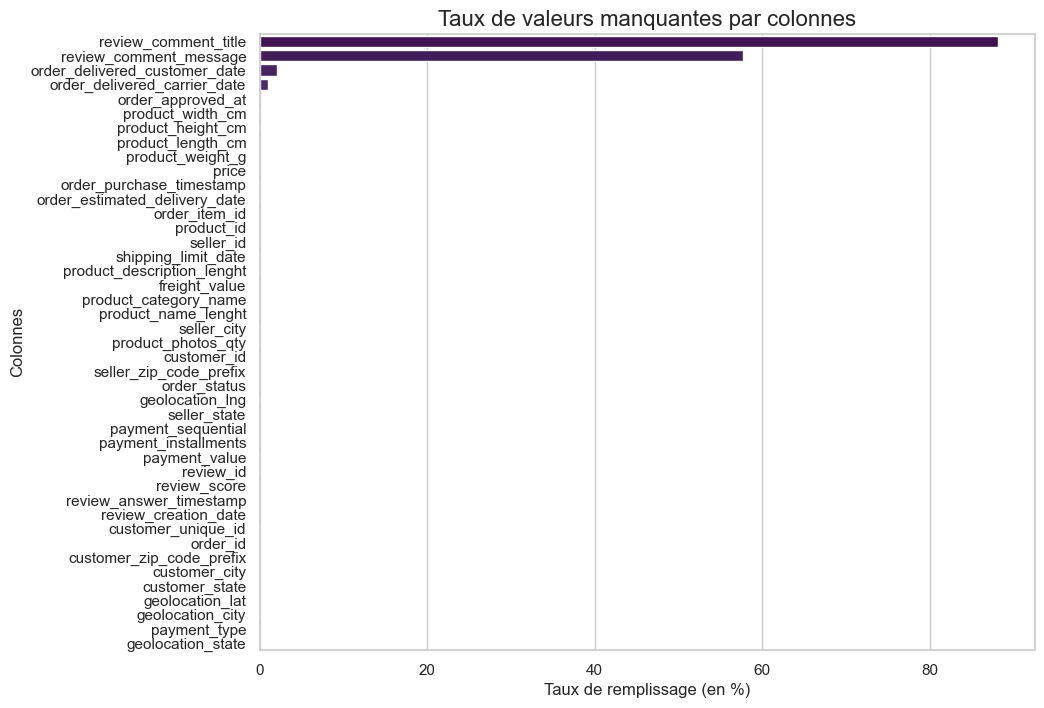

In [38]:
# Créer un Dataframe avec le pourcentage de valeurs manquantes (on appelle la fonction pourcentage)
df_pourcentage = pourcentage(df_merge)

# Tri du DataFrame par taux de remplissage
df_pourcentage = df_pourcentage.sort_values('Pourcentage de valeurs manquantes', ascending=False)

# Création du graphique
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
ax = sns.barplot(
    x="Pourcentage de valeurs manquantes", 
    y="Nom de la colonne", 
    data=df_pourcentage, 
    palette="viridis", 
    hue="Nom de la colonne", 
    legend=False
)
plt.xlabel("Taux de remplissage (en %)")
plt.ylabel("Colonnes")
plt.title("Taux de valeurs manquantes par colonnes", fontsize=16)
plt.show()

In [39]:
# Supprimer les commentaires (on n'utilisera seulement la review_score) trop de valeurs manquantes
df_merge = df_merge.drop(columns={'review_comment_title', 'review_comment_message'})

## 5. Suppression des colonnes non-utiles <a class="anchor" id="5"></a>

### 5.1 Statuts des commandes <a class="anchor" id="5_1"></a>

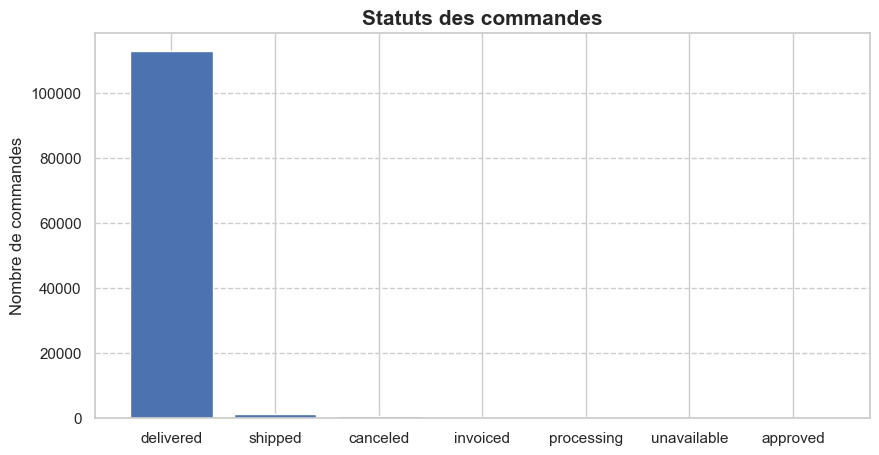

In [40]:
# Compter les status des commandes
counts = df_merge['order_status'].value_counts()

# Création d'un diagramme en barre
plt.figure(figsize=(10,5))
plt.bar(counts.index, counts)
plt.title('Statuts des commandes', fontsize=15, fontweight='bold')
plt.ylabel('Nombre de commandes')
plt.grid(axis='y', linestyle = 'dashed')
plt.show()

On peut garder seulement les commandes 'delivered'.

In [41]:
# Garder la valeur 'delivered' de la variable 'order_status'
df_merge = df_merge.loc[df_merge['order_status'] == 'delivered']

# On peut supprimer la colonne
df_merge = df_merge.drop(columns='order_status')

##### Nombre de valeurs manquantes restantes

In [42]:
# Créer un Dataframe avec le pourcentage de valeurs manquantes (on appelle la fonction pourcentage)
df_pourcentage = pourcentage(df_merge)

# Tri du DataFrame par taux de remplissage
df_pourcentage = df_pourcentage.sort_values(
    'Pourcentage de valeurs manquantes', 
    ascending=False
)
df_pourcentage.loc[df_pourcentage['Pourcentage de valeurs manquantes'] != 0]

,Nom de la colonne,Pourcentage de valeurs manquantes
0,order_approved_at,0.012399
1,order_delivered_customer_date,0.007085
2,order_delivered_carrier_date,0.001771
3,product_width_cm,0.000886
4,product_height_cm,0.000886
5,product_length_cm,0.000886
6,product_weight_g,0.000886


### 5.2 Suppression des autres colonnes <a class="anchor" id="5_2"></a>

In [43]:
colonnes_a_supprimer = [
    'customer_id', 'order_approved_at', 'order_delivered_carrier_date',
    'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_item_id',
    'shipping_limit_date', 'product_name_lenght', 'product_description_lenght', 
    'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm',
    'product_width_cm', 'seller_zip_code_prefix', 'seller_city', 'seller_state',
    'payment_sequential', 'payment_type', 'payment_installments', 'review_id', 'review_creation_date',
    'review_answer_timestamp'
]

df_merge = df_merge.drop(columns=colonnes_a_supprimer).reset_index(drop=True)

In [44]:
# Dataframe nettoyé
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112913 entries, 0 to 112912
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  112913 non-null  object 
 1   order_purchase_timestamp  112913 non-null  object 
 2   product_id                112913 non-null  object 
 3   seller_id                 112913 non-null  object 
 4   price                     112913 non-null  float64
 5   freight_value             112913 non-null  float64
 6   product_category_name     112913 non-null  object 
 7   payment_value             112913 non-null  float64
 8   review_score              112913 non-null  int64  
 9   customer_unique_id        112913 non-null  object 
 10  customer_zip_code_prefix  112913 non-null  object 
 11  customer_city             112913 non-null  object 
 12  customer_state            112913 non-null  object 
 13  geolocation_lat           112913 non-null  f

## 6. Analyse exploratoire <a class="anchor" id="6"></a>

### 6.1 Nombre de commandes par date d'achat <a class="anchor" id="6_1"></a>

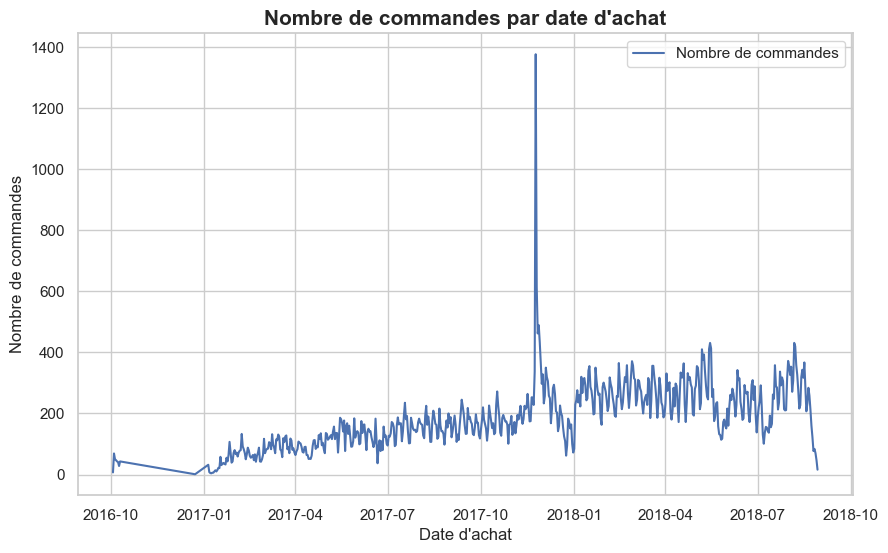

In [45]:
# Mettre le colonne 'order_purchase_timestamp' au format date
df_merge['order_purchase_timestamp'] = pd.to_datetime(df_merge['order_purchase_timestamp'])

# Regrouper par date et compter le nombre de commandes pour chaque date
commandes_par_date = df_merge.groupby(df_merge['order_purchase_timestamp'].dt.date).size()

# Créer un diagramme en ligne pour visualiser le nombre de commandes par date
plt.figure(figsize=(10, 6))
sns.lineplot(x=commandes_par_date.index, y=commandes_par_date.values, label='Nombre de commandes')
plt.title("Nombre de commandes par date d'achat", fontsize=15, fontweight='bold')
plt.xlabel("Date d'achat", fontsize=12)
plt.ylabel('Nombre de commandes', fontsize=12)
plt.show()

### 6.2 Répartition des prix des produits <a class="anchor" id="6_2"></a>

In [46]:
# Prix des produits
prix = df_merge[['product_id','price']].groupby(['product_id']).mean().reset_index()

# Nombre de ventes
nombre = df_merge['product_id'].value_counts().reset_index()
nombre.columns = ['product_id', 'nombre_ventes']

# Fusionner les informations sur les prix et le nombre de ventes
prix = pd.merge(prix, nombre, on='product_id')

# Calculons l'écart-type des prix
s = prix['price'].std()

# Rajoutons le Z-score
prix['Z-score'] = (prix['price'] - prix['price'].mean())/s

Le Z-score nous indique à combien d'écart-types se trouve le prix par rapport à la moyenne. Considérons qu'un Z-score égal à 2 signifie que la valeur est très éloignée de la moyenne et donc que ce prix est un 'outlier'.

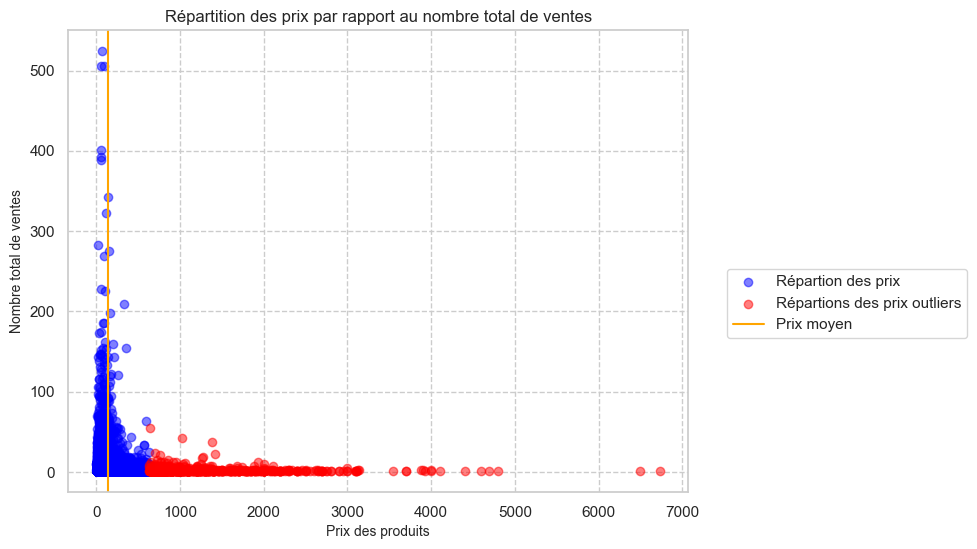

In [47]:
# Il faut isoler les outliers dans un Dataframe 'outliers'
outliers = prix.loc[(prix['Z-score'] >=2) | (prix['Z-score'] <= -2)]

# Puis isoler les autres valeurs dans un autre Dataframe 'non_outliers'
non_outliers = prix.drop(prix[(prix['Z-score'] >= 2) | (prix['Z-score'] <= -2)].index)

# Repésentons la répartition des prix sur un nuage de points afin de mieux visualiser
plt.figure(figsize=(8,6))
plt.scatter(
    non_outliers['price'], 
    non_outliers['nombre_ventes'], 
    color = 'blue', 
    label = 'Répartion des prix', 
    alpha=0.5
)
plt.scatter(
    outliers['price'], 
    outliers['nombre_ventes'], 
    color= 'red', 
    label= 'Répartions des prix outliers', 
    alpha=0.5
)
plt.axvline(prix['price'].mean(), color='orange', label = 'Prix moyen')
plt.title('Répartition des prix par rapport au nombre total de ventes', fontsize=12)
plt.xlabel('Prix des produits', fontsize=10)
plt.ylabel('Nombre total de ventes', fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='upper left')
plt.grid(linestyle = 'dashed')
plt.show()

Affichons les produits avec des prix 'outliers'.

In [48]:
# Sélectionner uniquement 'product_category_name' et 'product_id' de df_merge
categories_outliers = df_merge[['product_id', 'product_category_name']]

# Fusionner les informations sur les outliers avec les catégories
outliers = pd.merge(outliers, categories_outliers, on='product_id')

# Afficher le DataFrame résultant
outliers = outliers.sort_values('Z-score', ascending=False)
outliers

,product_id,price,nombre_ventes,Z-score,product_category_name
572,489ae2aa008f021502940f251d4cce7f,6735.000000,1,27.069637,housewares
201,1bdf5e6731585cf01aa8169c7028d6ad,6499.000000,1,26.100267,art
1259,a6492cc69376c469ab6f61d8f44de961,4799.000000,1,19.117516,small_appliances
1515,c3ed642d592594bb648ff4a04cee2747,4690.000000,1,18.669798,small_appliances
280,259037a6a41845e455183f89c5035f18,4590.000000,1,18.259048,computers
...,...,...,...,...,...
860,6a162a899a815ed15db1689e8efc976c,633.233333,9,2.006627,cool_stuff
861,6a162a899a815ed15db1689e8efc976c,633.233333,9,2.006627,cool_stuff
855,6a162a899a815ed15db1689e8efc976c,633.233333,9,2.006627,cool_stuff
193,1a7864db936b730688248bda816f1ce2,633.140000,1,2.006244,watches_gifts


### 6.3 Profils des clients <a class="anchor" id="6_3"></a>

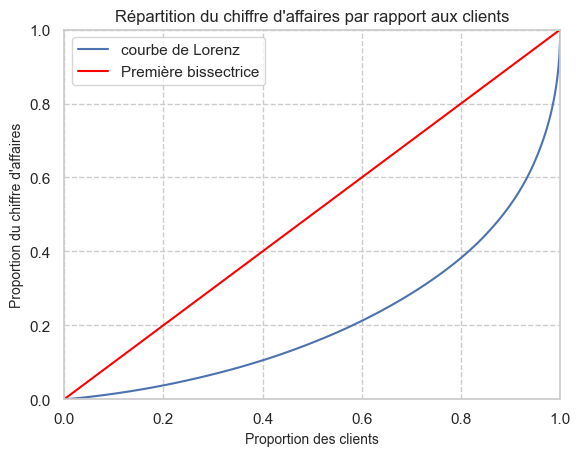

In [49]:
# CA cumulé par client
ca_cumule = df_merge[['customer_unique_id', 'payment_value']].groupby(['customer_unique_id']).sum().reset_index()
ca_cumule['CA_cumule'] = ca_cumule['payment_value']

# Afficher la courbe de Lorenz
n = len(ca_cumule['CA_cumule'])
lorenz = np.cumsum(np.sort(ca_cumule['CA_cumule'])) / ca_cumule['CA_cumule'].sum()
lorenz = np.append([0], lorenz)

# Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0.
# Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
xaxis = np.linspace(0-1/n, 1+1/n, n+1)

plt.figure()
plt.title("Répartition du chiffre d'affaires par rapport aux clients")
plt.plot(xaxis, lorenz, drawstyle='steps-post', label='courbe de Lorenz')
plt.plot([0, 1], [0, 1], color='red', label='Première bissectrice')  # Ajout de la première bissectrice
plt.xlabel('Proportion des clients', fontsize=10)
plt.ylabel("Proportion du chiffre d'affaires", fontsize=10)
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(linestyle='dashed')
plt.show()

In [50]:
# Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0,
# on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1
AUC = (lorenz.sum() - lorenz[-1]/2 - lorenz[0]/2) / n 
S = 0.5 - AUC  # surface entre la première bissectrice et le courbe de Lorenz
gini = 2 * S

print("L'indice de Gini est de :", round(gini, 2))

L'indice de Gini est de : 0.56


Un indice de Gini de 0.56 veut dire que la répartition du chiffre d'affaires est assez inégale. Certains clients génèrent une part plus importante du chiffre d'affaires.

Regardons de plus près le chiffre d'affaires des clients afin d'identifier de potentiels acheteurs importants.

In [51]:
# Regardons de plus près les CA cumulés pour indentifier les gros consommateurs
df_describe = ca_cumule.describe()
df_describe

,payment_value,CA_cumule
count,91233.000000,91233.000000
mean,212.342584,212.342584
std,631.858158,631.858158
min,9.590000,9.590000
25%,63.830000,63.830000
50%,112.880000,112.880000
75%,202.760000,202.760000
max,109312.640000,109312.640000


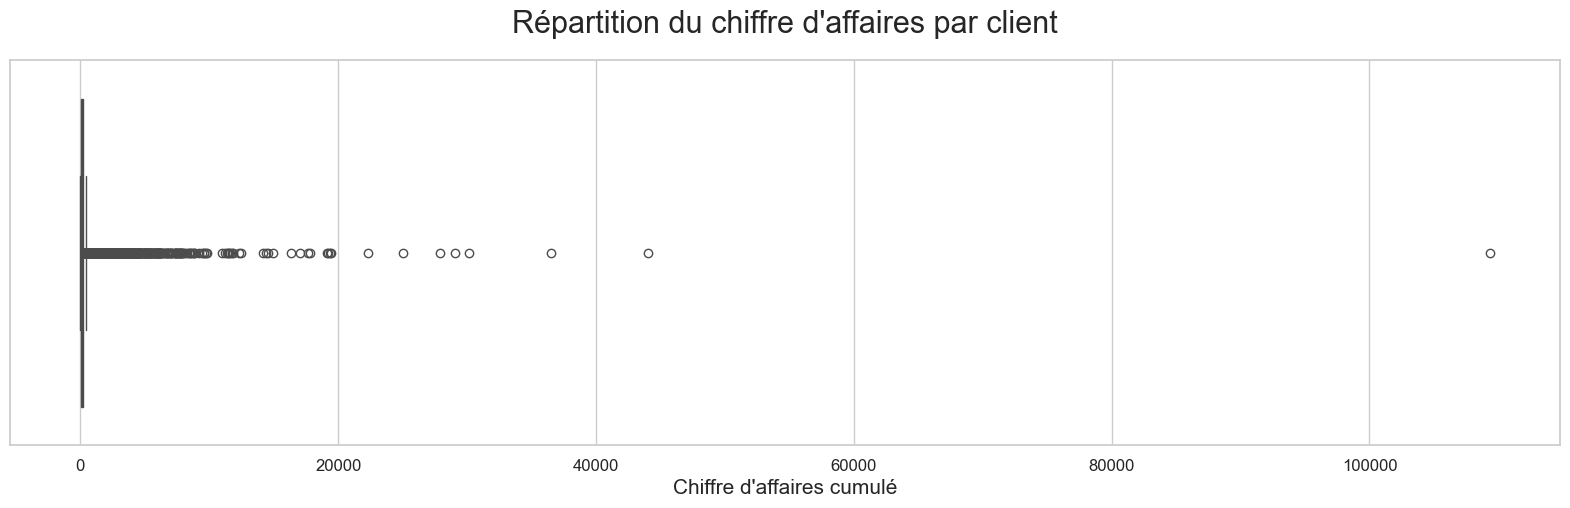

In [52]:
# Utilisons une boxplot pour visualiser cela
plt.figure(figsize=(20,5))
sns.set_style('whitegrid')
sns.boxplot(x=ca_cumule['CA_cumule'])
plt.title("Répartition du chiffre d'affaires par client", fontsize=22, y=1.05)
plt.xlabel("Chiffre d'affaires cumulé", fontsize=15)
plt.tick_params(labelsize=12)
plt.show()

On sait donc qu'il y a des clients très importants, probablement des professionnels. Cependant, le problème réside dans le fait que le maximum atteint est une valeur aberrante même parmi les clients que l'on pourrait qualifier de professionnels.

De plus, si on regarde plus en détail, on pourrait choisir la solution de supprimer les lignes correspondantes à tous les clients ayant un chiffre d'affaires cumulé supérieur à 20 000 car il peut s'agir d'erreurs ou de clients exceptionnels, mais par mesure de précaution, nous allons supprimer les lignes correspondantes aux individus en question.

In [53]:
# Créer une liste avec les ID des clients en question
id_outliers = ca_cumule.loc[ca_cumule['CA_cumule'] > 20000, 'customer_unique_id'].values.tolist()
id_outliers

# Suppression des lignes correspondantes dans df_merge
df_merge = df_merge[~df_merge['customer_unique_id'].isin(id_outliers)]

### 6.4 Localisation des clients <a class="anchor" id="6_4"></a>

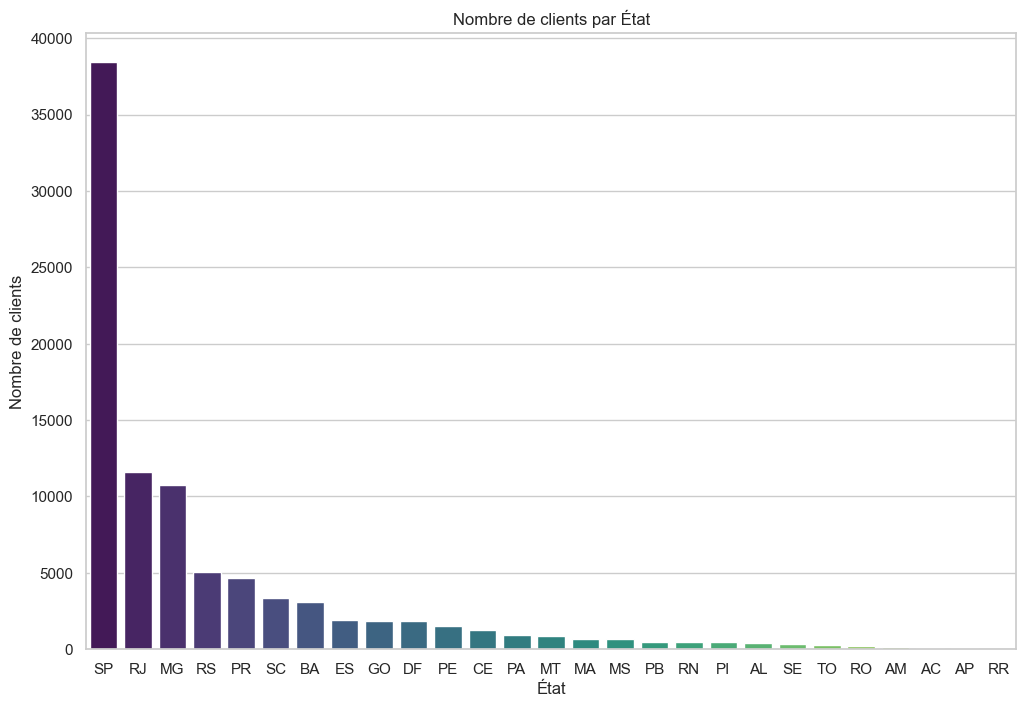

In [54]:
# Agréger par état et compter le nombre unique de clients
clients_par_etat = df_merge.groupby('geolocation_state')['customer_unique_id'].nunique().reset_index()
clients_par_etat = clients_par_etat.sort_values(by='customer_unique_id', ascending=False)

# Créer un diagramme en barres
plt.figure(figsize=(12, 8))
sns.barplot(
    x='geolocation_state', 
    y='customer_unique_id', 
    data=clients_par_etat, 
    palette="viridis", 
    hue='geolocation_state', 
    legend=False
)
plt.title('Nombre de clients par État')
plt.xlabel('État')
plt.ylabel('Nombre de clients')
plt.show()

### 6.5 Review Score <a class="anchor" id="6_5"></a>

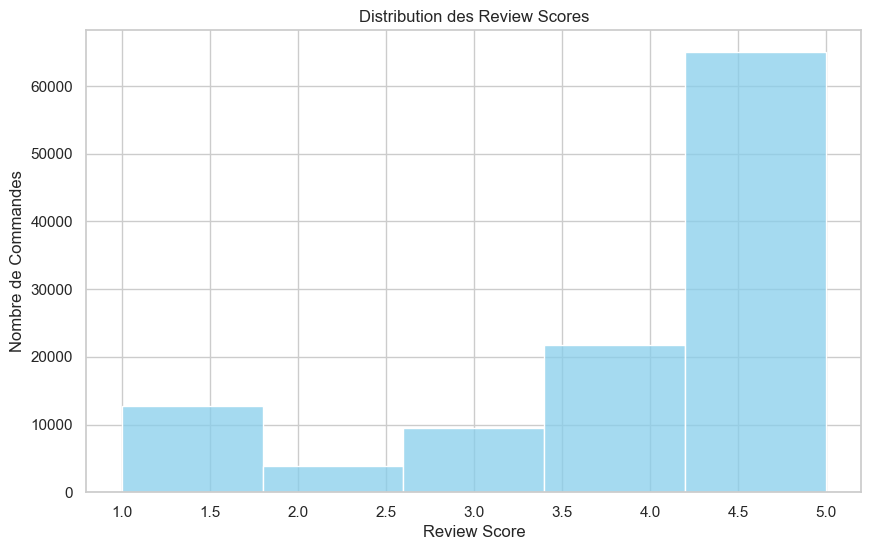

In [55]:
# Créer un histogramme pour le review_score
plt.figure(figsize=(10, 6))
sns.histplot(df_merge['review_score'], bins=5, kde=False, color='skyblue')
plt.title('Distribution des Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Nombre de Commandes')
plt.show()

### 6.6 Distribution des variables quantitatives <a class="anchor" id="6_6"></a>

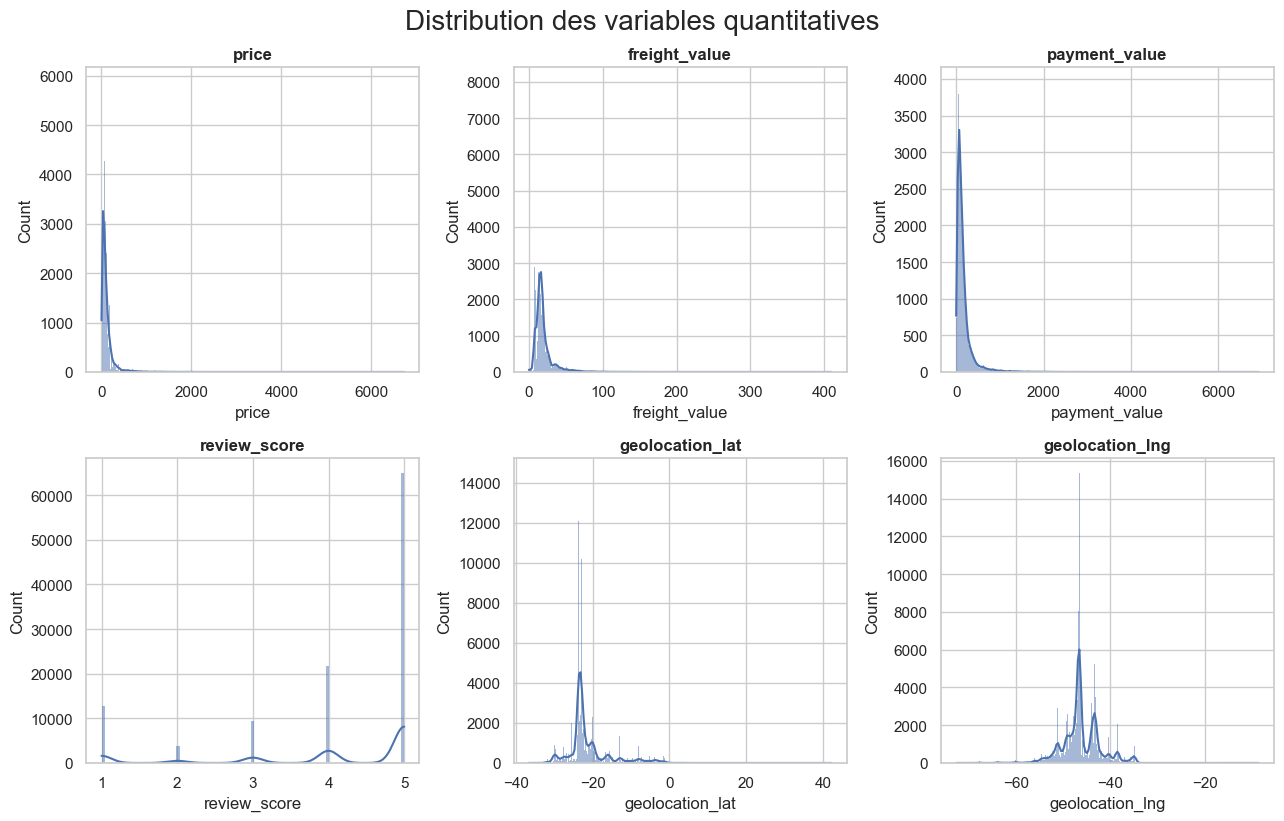

In [56]:
# Sélectionnons les variables quantitatives
variables_quantitatives = df_merge.select_dtypes(include=['float64', 'int64'])

# Affichons la distribution de chaque variable quantitative
plt.figure(figsize=(13, 8))

for i, colonne in enumerate(variables_quantitatives.columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_merge[colonne], kde=True, edgecolor='none')
    plt.title(colonne, fontweight='bold')

plt.tight_layout()
plt.suptitle('Distribution des variables quantitatives', fontsize=20, y=1.025)
plt.show()

### 6.7 Analyse des corrélations <a class="anchor" id="6_7"></a>

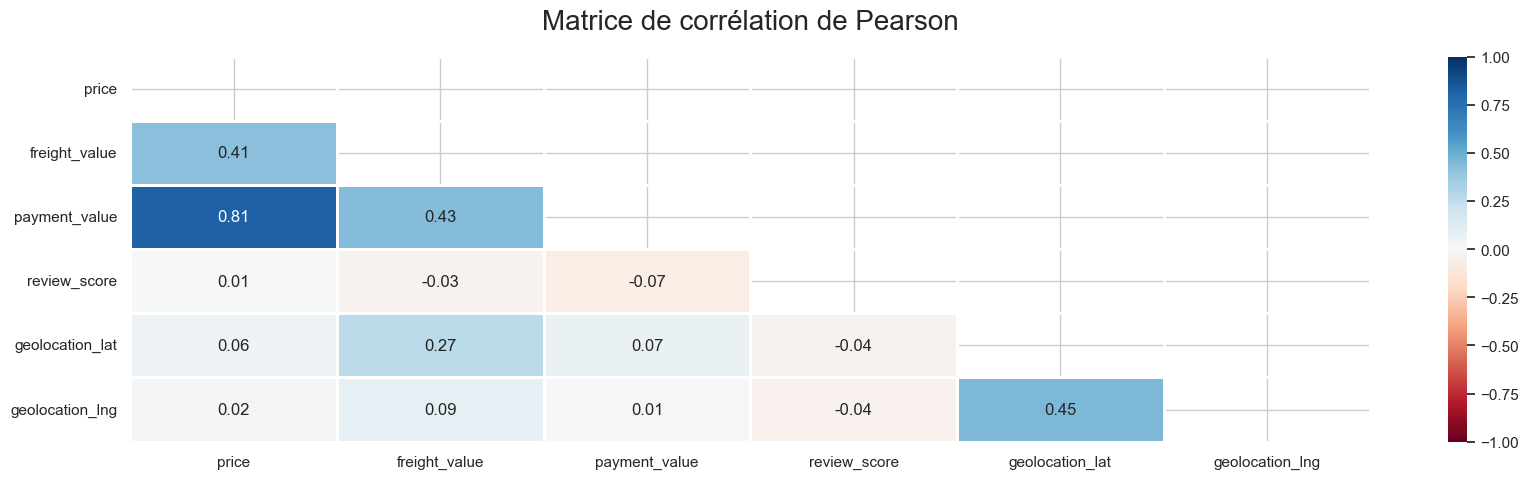

In [57]:
# Matrice de corrélation de Pearson
mask = np.triu(np.ones_like(variables_quantitatives.corr(), dtype=bool)) 
plt.figure(figsize=(20, 5))
sns.heatmap(
    variables_quantitatives.corr(), 
    mask=mask, 
    center=0, 
    cmap='RdBu', 
    linewidths=1, 
    annot=True, 
    fmt='.2f', 
    vmin=-1, 
    vmax=1
)
plt.title('Matrice de corrélation de Pearson', fontsize=20, y=1.05)
plt.show()

## 7. Feature engineering <a class="anchor" id="7"></a>

### 7.1 RFM (Récence, Fréquence et Montant) <a class="anchor" id="7_1"></a>

In [58]:
# Créer un Dataframe pour les données qui serviront au clustering
df_clustering = pd.DataFrame({'customer_unique_id': df_merge['customer_unique_id'].unique()})

# RECENCE
# Calculer la date maximale dans le DataFrame
date_max = df_merge['order_purchase_timestamp'].max()

# Calculer la récence pour chaque client
recence_par_customer = (date_max - df_merge.groupby('customer_unique_id')\
                        ['order_purchase_timestamp'].max()).dt.days

# Fusionner les valeurs de récence dans le DataFrame df_clustering
df_clustering = pd.merge(df_clustering, recence_par_customer.\
                         reset_index(name='R_recence'), on='customer_unique_id', how='left')

In [59]:
# FREQUENCE
# Calculer la fréquence pour chaque client
frequence_par_client = df_merge.groupby('customer_unique_id')['order_id'].nunique().reset_index(name='F_frequence')

# Fusionner les valeurs de fréquence dans le DataFrame df_clustering
df_clustering = pd.merge(df_clustering, frequence_par_client, on='customer_unique_id', how='left')

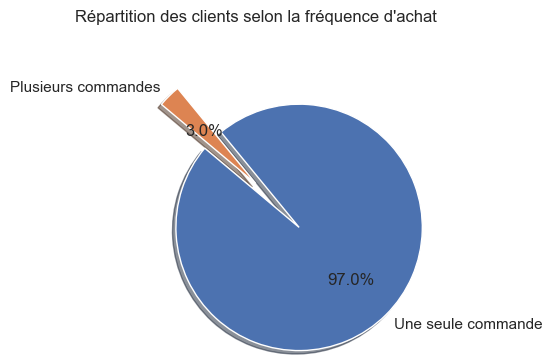

In [60]:
# Compter le nombre de clients avec une seule commande
clients_une_commande = frequence_par_client[frequence_par_client['F_frequence'] == 1]['customer_unique_id'].count()

# Compter le nombre total de clients
total_clients = len(df_clustering)

# Calculer le pourcentage de clients avec une seule commande
pourcentage_une_commande = (clients_une_commande / total_clients) * 100

# Créer le pie chart
plt.figure(figsize=(4,4))
sizes = [pourcentage_une_commande, 100 - pourcentage_une_commande]
plt.pie(
    sizes, 
    explode=(0.5, 0), 
    labels=['Une seule commande', 'Plusieurs commandes'], 
    autopct='%1.1f%%', 
    shadow=True, 
    startangle=140
)
plt.title('Répartition des clients selon la fréquence d\'achat')
plt.show()

In [61]:
# MONTANT
# Calculer le montant total dépensé par chaque client
montant_par_client = df_merge.groupby('customer_unique_id')['payment_value'].sum().reset_index(name='M_montant')

# Fusionner les valeurs de montant dans le DataFrame df_clustering
df_clustering = pd.merge(df_clustering, montant_par_client, on='customer_unique_id', how='left')

### 7.2 Moyenne des scores de commentaire <a class="anchor" id="7_2"></a>

In [62]:
# Rajoutons la moyenne du review_score pour les clients
moyenne_score = df_merge.groupby('customer_unique_id')['review_score'].mean().reset_index(name='Mean_review_score')

# Fusionner les valeurs de score dans le Dataframe df_clustering
df_clustering = pd.merge(df_clustering, moyenne_score, on='customer_unique_id', how='left')

## 8. Export des DataFrames <a class="anchor" id="8"></a>

### 8.1 Export du DataFrame df_clustering <a class="anchor" id="8_1"></a>

In [63]:
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91225 entries, 0 to 91224
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  91225 non-null  object 
 1   R_recence           91225 non-null  int64  
 2   F_frequence         91225 non-null  int64  
 3   M_montant           91225 non-null  float64
 4   Mean_review_score   91225 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 3.5+ MB


In [64]:
df_clustering.describe()

,R_recence,F_frequence,M_montant,Mean_review_score
count,91225.000000,91225.000000,91225.000000,91225.000000
mean,236.149685,1.032809,208.804403,4.154727
std,152.612152,0.205937,440.161224,1.279109
min,0.000000,1.000000,9.590000,1.000000
25%,113.000000,1.000000,63.830000,4.000000
50%,217.000000,1.000000,112.870000,5.000000
75%,344.000000,1.000000,202.740000,5.000000
max,694.000000,14.000000,19457.040000,5.000000


In [65]:
# Exporter le Dataframe  df_clustering en csv
df_clustering.to_csv('df_clustering.csv', index = False)

### 8.2 Export du DataFrame df_merge <a class="anchor" id="8_2"></a>

In [66]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112816 entries, 0 to 112912
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  112816 non-null  object        
 1   order_purchase_timestamp  112816 non-null  datetime64[ns]
 2   product_id                112816 non-null  object        
 3   seller_id                 112816 non-null  object        
 4   price                     112816 non-null  float64       
 5   freight_value             112816 non-null  float64       
 6   product_category_name     112816 non-null  object        
 7   payment_value             112816 non-null  float64       
 8   review_score              112816 non-null  int64         
 9   customer_unique_id        112816 non-null  object        
 10  customer_zip_code_prefix  112816 non-null  object        
 11  customer_city             112816 non-null  object        
 12  custome

In [67]:
# Exporter le Dataframe  df_merge en csv
df_merge.to_csv('df_merge.csv', index = False)